In [1]:
import pandas as pd
import numpy as np
import xlrd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Shortage data/Allyears_Canada_Shortage.xlsx")
df.head()

,Report ID,Drug Identification Number,Report Type,Brand name,Company Name,Common or Proper name,Ingredients,Strength(s),Packaging size,Route of administration,...,ATC description,Anticipated start date,Actual start date,Estimated end date,Actual end date,Reason,Date Created,Date Updated,Tier 3,Days
0,28240,1963937.0,Shortage,0.9% SODIUM CHLORIDE IRRIGATION USP,B. BRAUN MEDICAL INC,Sodium Chloride,SODIUM CHLORIDE,0.009,"500mL, 1000mL, 2000mL, 4000mL",IRRIGATION,...,IRRIGATING SOLUTIONS,NaN,2017-11-03,NaN,NaN,Requirements related to complying with good ma...,2017-11-06,2019-04-04,No,NaN
1,24792,2141450.0,Shortage,20% PROSOL,BAXTER CORPORATION,20% PROSOL,PHENYLALANINE_x000D_ HISTIDINE_x000D_ TRYPTOPH...,1G_x000D_ 1.18G_x000D_ 0.32G_x000D_ 1.08G_x000...,2000 mL,INTRAVENOUS,...,I.V. SOLUTIONS,2017-11-15 00:00:00,2017-11-15,2017-12-15 00:00:00,2017-11-21 00:00:00,Disruption of the manufacture of the drug.,2017-10-10,2017-11-22,No,6.0
2,27274,2248489.0,Shortage,"4% ASTRACAINE DENTAL WITH EPINEPHRINE 1:200,00...",DENTSPLY CANADA LIMITED,Articaine Hydrochloride 40 mg/mL and Epinephri...,ARTICAINE HYDROCHLORIDE_x000D_ EPINEPHRINE,40MG_x000D_ 0.005MG,100 1.8 mL cartridges/box,BLOCK/INFILTRATION,...,"ANESTHETICS, LOCAL",2018-03-01 00:00:00,2018-03-01,2018-04-30 00:00:00,2018-03-29 00:00:00,Disruption of the manufacture of the drug.,2017-10-27,2018-03-30,No,28.0
3,26870,2299135.0,Shortage,40 (MEQ)MMOL/L POTASSIUM CHLORIDE PLUS 5% DEXT...,HOSPIRA HEALTHCARE CORPORATION,Potassium Chloride in 5% Dextrose and 0.9% Sod...,DEXTROSE_x000D_ POTASSIUM CHLORIDE_x000D_ SODI...,5.0G_x000D_ 0.3G_x000D_ 0.9G,1000ML,INTRAVENOUS,...,I.V. SOLUTIONS,2017-10-17 00:00:00,NaT,2017-11-30 00:00:00,2017-11-30 00:00:00,Other (Please describe in comments),2017-10-24,2018-12-28,No,NaN
4,30198,37974.0,Shortage,50% DEXTROSE INJECTION USP,HOSPIRA HEALTHCARE CORPORATION,50% DEXTROSE,DEXTROSE,500MG,25x50mL GVL,INTRAVENOUS,...,I.V. SOLUTIONS,NaN,2018-01-19,NaN,2018-03-02 00:00:00,Disruption of the manufacture of the drug.,2017-11-22,2018-03-05,No,42.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16923 entries, 0 to 16922
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Report ID                   16923 non-null  int64         
 1   Drug Identification Number  16919 non-null  float64       
 2   Report Type                 16923 non-null  object        
 3   Brand name                  16923 non-null  object        
 4   Company Name                16902 non-null  object        
 5   Common or Proper name       16921 non-null  object        
 6   Ingredients                 16846 non-null  object        
 7   Strength(s)                 16860 non-null  object        
 8   Packaging size              16809 non-null  object        
 9   Route of administration     16858 non-null  object        
 10  Shortage status             16923 non-null  object        
 11  Dosage form(s)              16858 non-null  object    

In [4]:
df.dtypes

Report ID                              int64
Drug Identification Number           float64
Report Type                           object
Brand name                            object
Company Name                          object
Common or Proper name                 object
Ingredients                           object
Strength(s)                           object
Packaging size                        object
Route of administration               object
Shortage status                       object
Dosage form(s)                        object
ATC Code                              object
ATC description                       object
Anticipated start date                object
Actual start date             datetime64[ns]
Estimated end date                    object
Actual end date                       object
Reason                                object
Date Created                  datetime64[ns]
Date Updated                  datetime64[ns]
Tier 3                                object
Days      

In [5]:
df.corr()

,Report ID,Drug Identification Number,Days
Report ID,1.000000,0.005387,-0.293277
Drug Identification Number,0.005387,1.000000,0.042358
Days,-0.293277,0.042358,1.000000


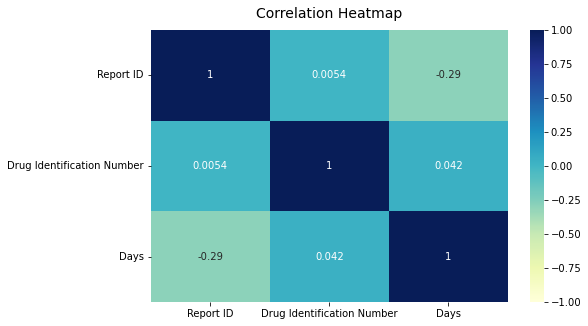

In [6]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 5))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = "YlGnBu")

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

In [7]:
df = df.drop(['Report ID',
'Drug Identification Number',
'Report Type',
'Brand name',
'Company Name',
'Common or Proper name',
'Ingredients',
'Strength(s)',
'Packaging size',
'Route of administration',
'Shortage status',
'Dosage form(s)',
'ATC Code',
'ATC description',
'Anticipated start date',
'Estimated end date',
'Actual end date',
'Reason',
'Date Created',
'Date Updated',
'Tier 3'
],axis=1)

In [8]:
df.dtypes

Actual start date    datetime64[ns]
Days                        float64
dtype: object

In [9]:
df.head()

,Actual start date,Days
0,2017-11-03,NaN
1,2017-11-15,6.0
2,2018-03-01,28.0
3,NaT,NaN
4,2018-01-19,42.0


In [10]:
df.mean()

Days    136.356658
dtype: float64

In [11]:
df.replace({pd.NaT: "2017-01-01 00:00:00"}, inplace=True)

In [12]:
df.fillna(df.mean(), inplace=True)
df.head()

,Actual start date,Days
0,2017-11-03 00:00:00,136.356658
1,2017-11-15 00:00:00,6.000000
2,2018-03-01 00:00:00,28.000000
3,2017-01-01 00:00:00,136.356658
4,2018-01-19 00:00:00,42.000000


In [13]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2017-11-03 00:00:00,136.356658
1,2017-11-15 00:00:00,6.000000
2,2018-03-01 00:00:00,28.000000
3,2017-01-01 00:00:00,136.356658
4,2018-01-19 00:00:00,42.000000


In [14]:
p = Prophet(interval_width=0.92, daily_seasonality=True)

In [15]:
model = p.fit(df)

13:36:54 - cmdstanpy - INFO - Chain [1] start processing
13:37:11 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = p.make_future_dataframe(periods=50, freq='D')
future.tail()

,ds
1951,2024-02-05
1952,2024-02-06
1953,2024-02-07
1954,2024-02-08
1955,2024-02-09


In [23]:
forecast_prediction = p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1951,2024-02-05,1953.285137,-249.619067,444.308603,1952.896128,1953.453174,-1862.413628,-1862.413628,-1862.413628,-1863.927306,...,1.264959,1.264959,1.264959,0.248720,0.248720,0.248720,0.0,0.0,0.0,90.871509
1952,2024-02-06,1953.298185,-265.873146,411.964278,1952.869054,1953.484427,-1871.159251,-1871.159251,-1871.159251,-1863.927306,...,-6.893029,-6.893029,-6.893029,-0.338916,-0.338916,-0.338916,0.0,0.0,0.0,82.138934
1953,2024-02-07,1953.311233,-254.294300,420.218109,1952.851268,1953.515490,-1866.035688,-1866.035688,-1866.035688,-1863.927306,...,-1.406166,-1.406166,-1.406166,-0.702217,-0.702217,-0.702217,0.0,0.0,0.0,87.275545
1954,2024-02-08,1953.324282,-257.055315,442.794596,1952.833107,1953.545777,-1856.981627,-1856.981627,-1856.981627,-1863.927306,...,7.771935,7.771935,7.771935,-0.826256,-0.826256,-0.826256,0.0,0.0,0.0,96.342655
1955,2024-02-09,1953.337330,-246.657859,398.230376,1952.802610,1953.575938,-1878.847428,-1878.847428,-1878.847428,-1863.927306,...,-14.212553,-14.212553,-14.212553,-0.707569,-0.707569,-0.707569,0.0,0.0,0.0,74.489902


### Visualize these predictions.

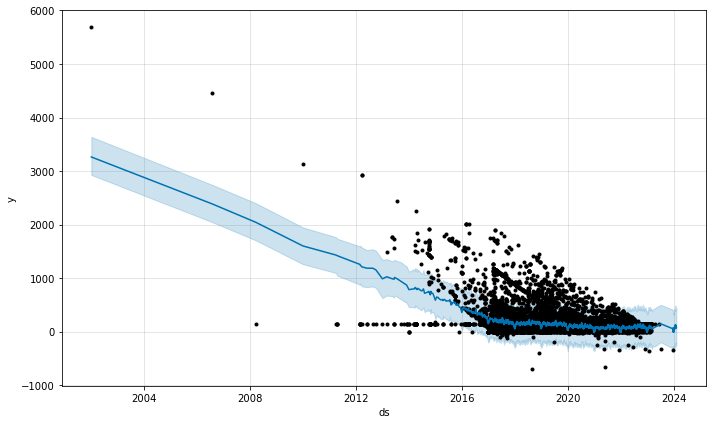

In [24]:
plot1 = p.plot(forecast_prediction)